In [18]:
import pandas as pd
returns = pd.read_csv("Portfolios_Formed_on_ME_monthly_EW.csv",
                      header=0, #set the first row as column index
                      index_col=0, parse_dates=True, #set the first column as row index and tell pandas to convert number to date
                      na_values=-99.99 #tell pandas that missing values have been encoded as -99.99
)
returns = returns[['Lo 20', 'Hi 20']]
returns.columns = ['SmallCap', 'LargeCap']
returns = returns/100
returns.index = pd.to_datetime(returns.index, format="%Y%m")
returns.index = returns.index.to_period('M')
returns.head()

,SmallCap,LargeCap
1926-07,-0.0057,0.0333
1926-08,0.0384,0.0233
1926-09,-0.0048,-0.0009
1926-10,-0.0329,-0.0295
1926-11,-0.0055,0.0316


#### Compute drawdowns:

- Step 1. Compute a wealth index

- Step 2. Compute previous peaks

- Step 3. Compute drawdown = the wealth value as a percentage of the previous peak

<Axes: >

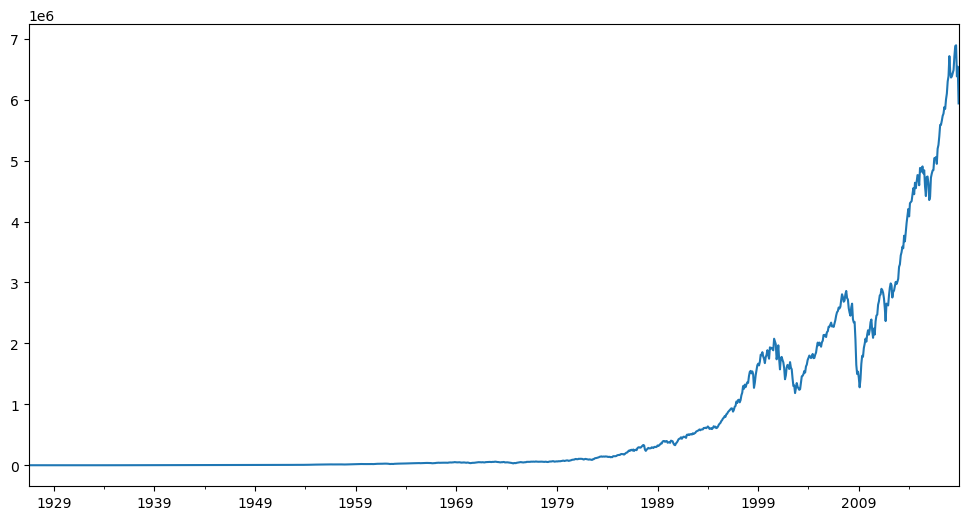

In [19]:
#Step 1. Compute a wealth index = the value of the portfolio as it compounds over time
WealthIndex = 1000*(1+returns['LargeCap']).cumprod() #assumes starting value = $1000
WealthIndex.plot.line(figsize=(12,6))

<Axes: >

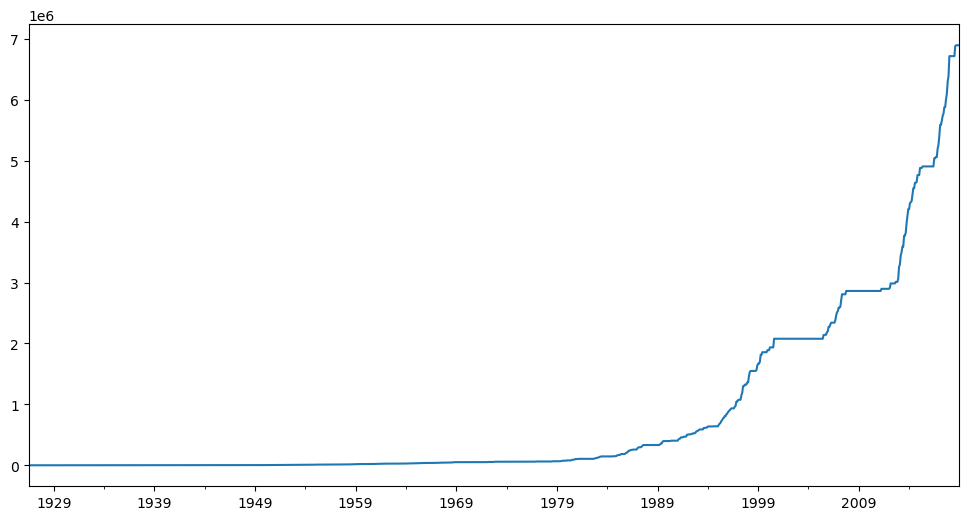

In [20]:
#Step 2. Compute previous peaks
PreviousPeaks = WealthIndex.cummax()
PreviousPeaks.plot.line(figsize=(12,6))

<Axes: >

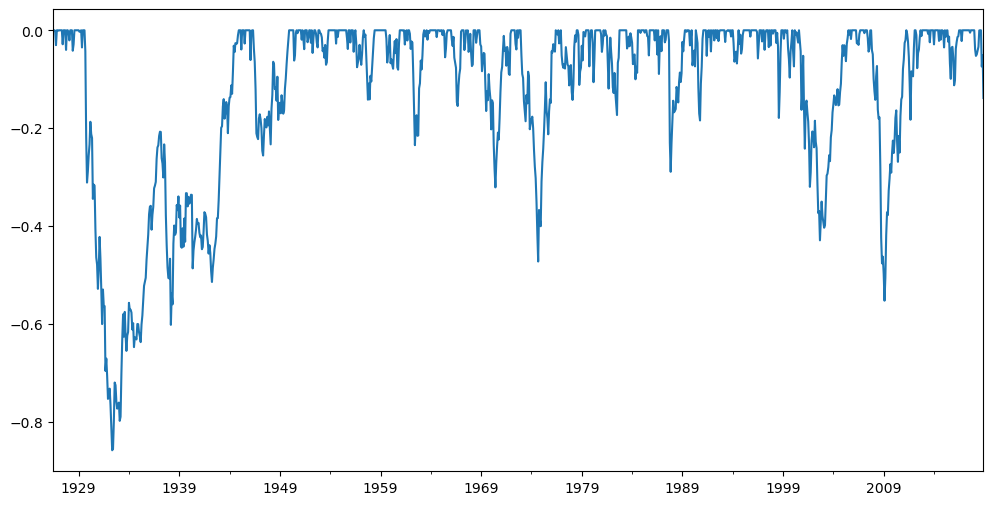

In [21]:
#Step 3. Compute drawdown = the wealth value as a percentage of the previous peak
Drawdown = (WealthIndex - PreviousPeaks) / PreviousPeaks
Drawdown.plot.line(figsize=(12,6))

#### Write a function to do all three steps automatically:

In [22]:
def draw(ReturnSeries: pd.Series):
    
    #Create a documentation string for the function
    """
    Takes a time sereis of asset returns
    Computes and returns a DataFrame that contains:
    the wealth index
    the previous peaks
    percent drawdown
    """

    WealthIndex = 1000*(1+ReturnSeries).cumprod() #assumes starting value = $1000
    PreviousPeaks = WealthIndex.cummax()
    Drawdowns = (WealthIndex - PreviousPeaks) / PreviousPeaks

    return pd.DataFrame({
        "Wealth": WealthIndex,
        "Peaks": PreviousPeaks,
        "Drawdowns": Drawdowns
    })
#'ReturnSeries: pd.Series' tells python that we expect 'ReturnSeries' to be a pandas series
   

#### Use new function to quickly and easily visualize historical data:

In [23]:
#Show historic large cap as DataFrame
draw(returns["LargeCap"]).head()

,Wealth,Peaks,Drawdowns
1926-07,1033.300000,1033.300000,0.000000
1926-08,1057.375890,1057.375890,0.000000
1926-09,1056.424252,1057.375890,-0.000900
1926-10,1025.259736,1057.375890,-0.030373
1926-11,1057.657944,1057.657944,0.000000


<Axes: title={'center': 'Growth of $1000 since 1995'}>

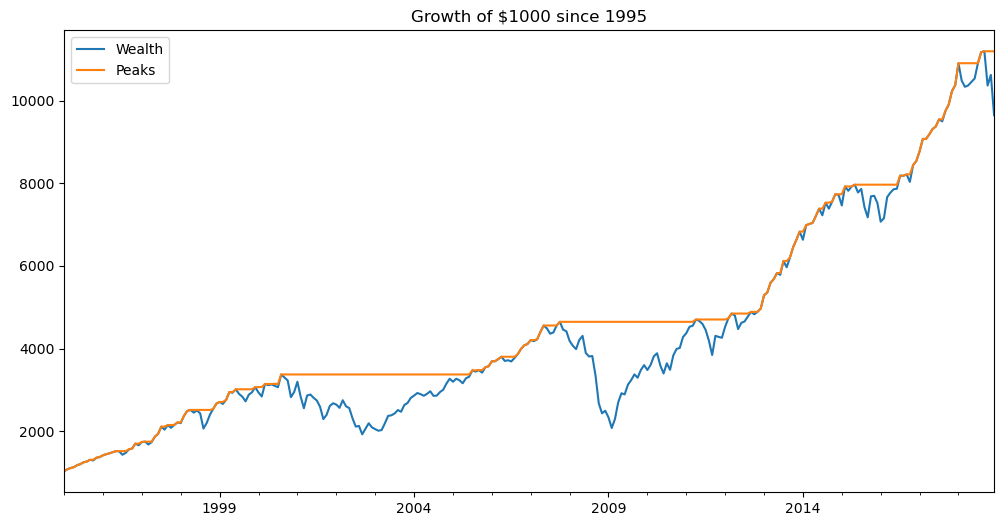

In [24]:
#Use function to plot the a large cap wealth index since 1995
draw(returns["1995":]["LargeCap"])[["Wealth", "Peaks"]].plot(title="Growth of $1000 since 1995",figsize=(12,6))

<Axes: title={'center': 'Growth of $1000 since 1995'}>

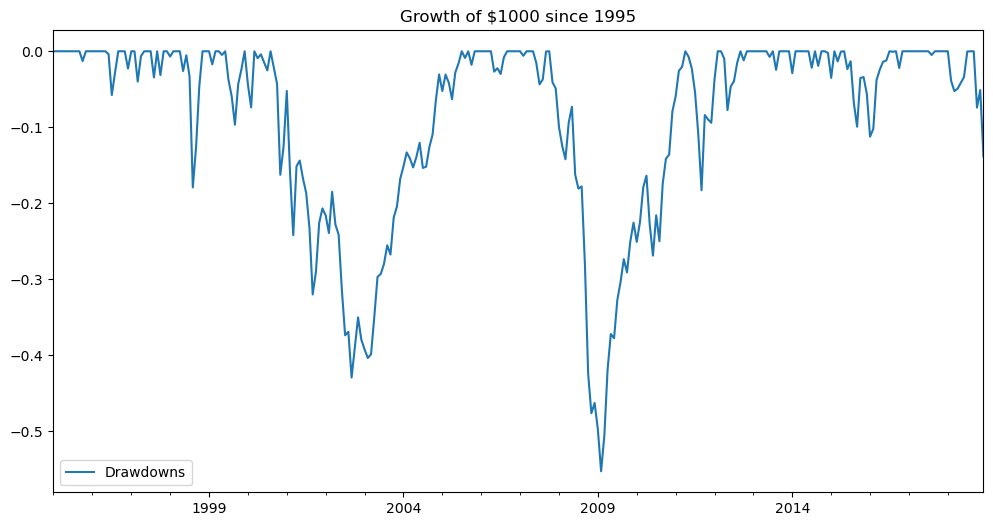

In [25]:
#Use function to plot the corresponding drawdowns since 1995
draw(returns["1995":]["LargeCap"])[["Drawdowns"]].plot(title="Growth of $1000 since 1995",figsize=(12,6))

#### Use the function to find notable drawdowns throughout history:

In [26]:
draw(returns["LargeCap"])["Drawdowns"].min()

-0.8585017065044246

In [27]:
draw(returns["LargeCap"])["Drawdowns"].idxmin()

Period('1932-05', 'M')

In [28]:
draw(returns["1932-05":]["LargeCap"])["Drawdowns"].min()

-0.5527349978713653

In [29]:
draw(returns["1932-05":]["LargeCap"])["Drawdowns"].idxmin()

Period('2009-02', 'M')

In [30]:
draw(returns["2009-02":]["LargeCap"])["Drawdowns"].min()

-0.18285277388780735

In [31]:
draw(returns["2009-02":]["LargeCap"])["Drawdowns"].idxmin()

Period('2011-09', 'M')

In [32]:
draw(returns["2011-09":]["LargeCap"])["Drawdowns"].min()

-0.13844383721100026

In [33]:
draw(returns["2011-09":]["LargeCap"])["Drawdowns"].idxmin()

Period('2018-12', 'M')

In [34]:
draw(returns["2018-12":]["LargeCap"])["Drawdowns"].min()

0.0